# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [116]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sb
%matplotlib inline

### Step 2: Read in your data set 

In [71]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [72]:
print df_raw.count()
a = 0
for x in df_raw.admit:
    if x==float('nan'):
        a = a+1
print a

admit       400
gre         398
gpa         398
prestige    399
dtype: int64
0


Answer: 400

#### Question 2. Create a summary table

In [75]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [76]:
df_nanismean = pd.read_csv("admissions.csv")
df_nanismean.gre.fillna(df_nanismean.gre.mean(), inplace=True)
df_nanismean.gpa.fillna(df_nanismean.gpa.mean(), inplace=True)
df_nanismean.prestige.fillna(df_nanismean.prestige.mean(), inplace=True)

In [77]:
df_nanismean.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.000000
mean,0.317500,588.040201,3.390930,2.486216
std,0.466087,115.338353,0.379675,0.944147
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.390930,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

In [78]:
print 'GRE Max: ', df_nanismean.gre.max()
print 'GRE Min: ', df_nanismean.gre.min()
print 'GPA Max: ', df_nanismean.gpa.max()
print 'GPA Min: ', df_nanismean.gpa.min()

GRE Max:  800.0
GRE Min:  220.0
GPA Max:  4.0
GPA Min:  2.26


Answer: We have not scaled the data in any way, so the range of observations in GRE is from 220 to 800, whereas the range of observations in GPA is from 2.26 to 4.00.

#### Question 4. Drop data points with missing data

In [79]:
df_drop = df_raw.dropna()
df_drop.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [115]:
print df_raw.count()
indexraw = pd.isnull(df_raw).any(1).nonzero()[0]
print df_raw.loc[indexraw]
print ('\n')
print df_drop.count()
indexdrop = pd.isnull(df_drop).any(1).nonzero()[0]
print df_drop.loc[indexdrop]

admit       400
gre         398
gpa         398
prestige    399
dtype: int64
     admit    gre   gpa  prestige
187      0    NaN   NaN       2.0
212      0    NaN  2.87       2.0
236      1  660.0   NaN       NaN


admit       397
gre         397
gpa         397
prestige    397
dtype: int64
Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []


Answer: I checked the source code to make sure that dropna drops all rows with NaN values, but also displayed all rows in the raw data with NaN values (there are 3 such rows out of 400). After dropping rows with NaN values, the result has the same data set with 3 less rows (total of 397 rows) and no NaN values that come up. 

#### Question 6. Create box plots for GRE and GPA

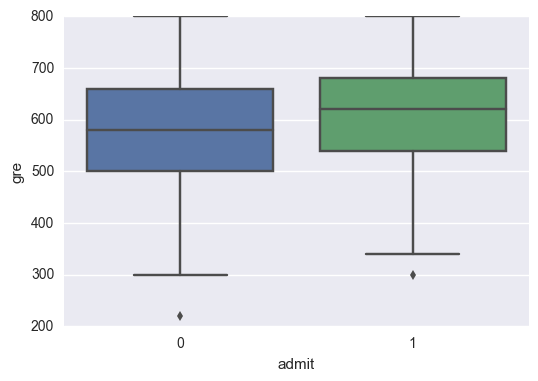

In [120]:
#boxplot 1
sb.boxplot(x="admit", y="gre", data=df_drop)

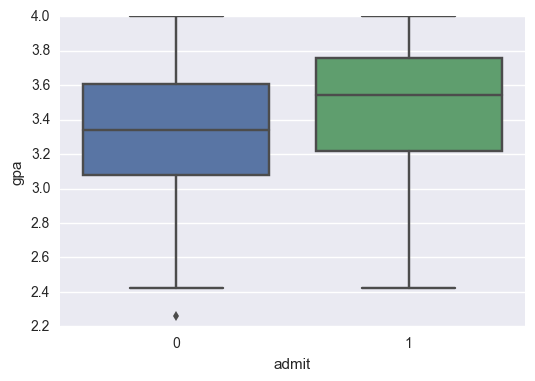

In [121]:
#boxplot 2 
sb.boxplot(x="admit", y="gpa", data=df_drop)

#### Question 7. What do this plots show?

Answer: Shows min-max range (with outliers) and the quartile distribution (25th, 50th, 75th) of gre and gpa observations for students that were not admitted and for those students who were admitted.

#### Question 8. Describe each distribution 

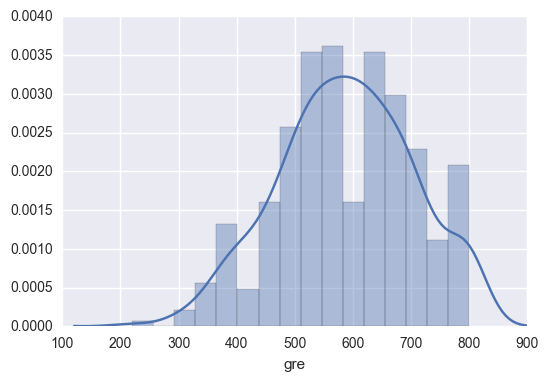

In [124]:
# plot the distribution of each variable 
sb.distplot(df_drop.gre);

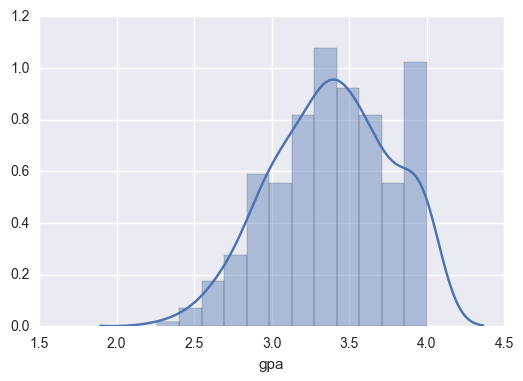

In [125]:
sb.distplot(df_drop.gpa);

Answer: Both gre and gpa variable distributions show a longer left tail (gpa is especially skewed left). Kernel density estimate for both are single peaked, but its clear that the actual data has multiple peaks: e.g. gpa exhibits normal distribution except that the second highest distribution of gpa scores lies very close to the max of 4.0. GRE also shows multiple spikes, such as near a score of 800 and scores around 600. 

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: We would most likely not meet a strict assumption of a normal distribution

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: We can scale and transform the data (logarithmic transformation, for instance). We could also group data points differently to simulate a normal distribution (i.e., for all gpa scores from 3.9-4.0, reclassify as "5", where as from 3.8-3.9 as "4", etc.).

#### Question 11. Which of our variables are potentially colinear? 

In [130]:
# create a correlation matrix for the data
df_drop.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Prestige is negatively correlated with admission (makes sense, the more prestigious the school, the harder to get in) as well as gre and GPA (which does not make as much sense as one would think prestigious schools require higher gre and GPA scores). Admission is positively correlated with GRE and GPA, which makes sense as stronger candidates that get admitted would have higher GPA and GRE scores. GPA and GRE are the most correlated, which makes sense as high performing students that do well in class are likely to also test well (there is also an argument that GRE is positive indicator for GPA performance in graduate school)

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I would plot out the two variables using a correlation matrix and then create a heatmap from the correlation matrix results.

#### Question 14. What is your hypothesis? 

Answer: I would say that prestige and admission rates are negatively correlated (supported by the correlation matrix above).

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data
You could use the mean of the column to fill in the missing data, or back/forward fill the data using data around the missing value in the same column.

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data 
(I think I did this above using means)